In [2]:
# Import the random module.
import random

In [3]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [4]:
latitudes

[37.65711966431255,
 -66.97544912354977,
 43.00947273680179,
 -40.372505914528375,
 30.15226051695981,
 69.28695732604388,
 77.99390812372009,
 29.844805765596814,
 -46.13112177056716,
 -51.10565975707981]

In [5]:
# Import the NumPy module.
import numpy as np

In [6]:
np.random.uniform(-90.000, 90.000, size=50)

array([-54.97367485,  -3.37929518,  -7.09351407,  41.00031402,
       -10.3736568 ,  75.0548884 , -20.56144598, -35.64665585,
        50.58401449, -33.81298383,  81.12310554, -88.50112486,
       -60.02566447, -63.66506289, -42.87619195, -71.06599971,
        -0.94310516, -76.01104603, -51.08644842, -44.3802855 ,
        -0.60119595,  45.74037501, -76.45514907,  55.65926849,
        38.50363989,  -0.94025451, -47.55367726,  61.59225687,
        73.71046815, -18.87961159,  28.52272437,  45.29897143,
        49.51960925, -48.26338357,  17.55198509,  20.63389161,
        58.76123918,  34.82122443,  28.1026691 ,  89.47519653,
        69.8581086 , -55.85826528, -56.39465863,  86.62212234,
        62.32244931,  10.89841785, -76.52752564, -57.90509533,
        84.50722031, -44.13183134])

In [7]:
# Import timeit.
import timeit
%timeit np.random.uniform(-90.000, 90.000, size=1500)

13.6 µs ± 683 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.58 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
# Import the dependencies.  WeatherPy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# # Create a set of random latitude and longitude combinations.
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# lat_lngs = zip(lats, lngs)
# lat_lngs

In [11]:
# # Add the latitudes and longitudes to a list.
# coordinates = list(lat_lngs)
# lat_lngs

In [12]:
# pip install citipy

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = list(zip(x, y)) #Warining zip allocate one shot

In [15]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
      citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

5

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [20]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [22]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":600,"main":"Snow","description":"light snow","icon":"13n"}],"base":"stations","main":{"temp":19.92,"feels_like":7.32,"temp_min":16.29,"temp_max":23.43,"pressure":1022,"humidity":87},"visibility":6437,"wind":{"speed":16.11,"deg":330,"gust":23.02},"snow":{"1h":0.12},"clouds":{"all":100},"dt":1645837714,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1645788373,"sunset":1645828123},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [23]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 19.92,
  'feels_like': 7.32,
  'temp_min': 16.29,
  'temp_max': 23.43,
  'pressure': 1022,
  'humidity': 87},
 'visibility': 6437,
 'wind': {'speed': 16.11, 'deg': 330, 'gust': 23.02},
 'snow': {'1h': 0.12},
 'clouds': {'all': 100},
 'dt': 1645837714,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1645788373,
  'sunset': 1645828123},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [24]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [25]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data['sys']


{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1645788373,
 'sunset': 1645828123}

In [26]:
boston_data["dt"]

1645837714

In [27]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 23.43 87 100 16.11


In [28]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-02-26 01:08:34'

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [30]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [31]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [32]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

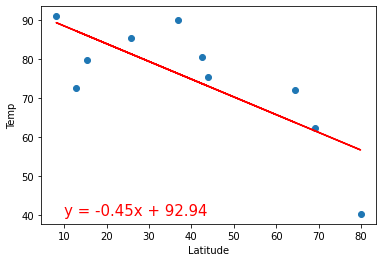

In [33]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

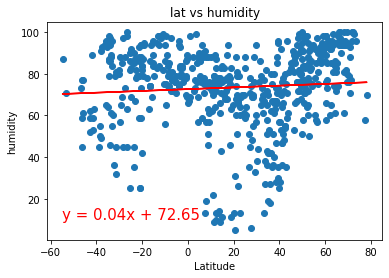

In [43]:
# Extract relevant fields from the DataFrame for plotting.
city_data_df = pd.read_csv("weather_data/cities.csv")
lats = city_data_df["Lat"]
temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Perform linear regression. humidity, cloudiness, and wind speed
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-55,10), fontsize=15, color="red")
plt.title("lat vs humidity")
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.show()

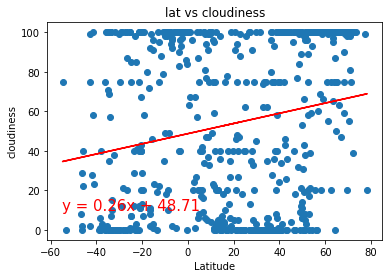

In [44]:
# Perform linear regression. humidity, cloudiness, and wind speed
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-55,10), fontsize=15, color="red")
plt.title("lat vs cloudiness")
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.show()

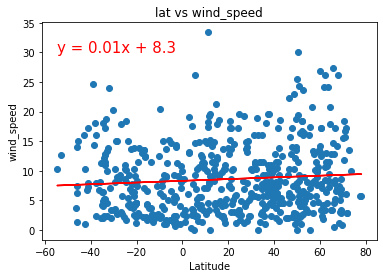

In [47]:
# Perform linear regression. humidity, cloudiness, and wind speed
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-55,30), fontsize=15, color="red")
plt.title("lat vs wind_speed")
plt.xlabel('Latitude')
plt.ylabel('wind_speed')
plt.show()